In [1]:
import os
from pathlib import Path
from aocd.models import Puzzle
import collections
import numpy as np
import re
from statistics import median, mean
import math
import queue
import itertools
import more_itertools
infinite_defaultdict = lambda: collections.defaultdict(infinite_defaultdict)
from copy import copy
import functools
import heapq
import operator
from tqdm.notebook import trange, tqdm
import networkx as nx
import pprint
from PIL import Image, ImageDraw
import bisect
import scipy as sp
import matplotlib.pyplot as plt
import pylab
from scipy import ndimage

# Day 1

In [ ]:
puzzle = Puzzle(2024, 1)

In [ ]:
data = [list(map(int, line.split("   "))) for line in puzzle.input_data.split("\n")]

## Part 1 

In [ ]:
sorted_data = [sorted(ls) for ls in zip(*data)]
res_a = sum(abs(x - y) for x, y in zip(*sorted_data))

In [ ]:
puzzle.answer_a = res_a

## Part 2

In [ ]:
x_counted = collections.Counter(x for x, _ in data)
y_counted = collections.Counter(y for _, y in data)

In [ ]:
res_b = sum(xk * xv * y_counted[xk] for xk, xv in x_counted.items())

In [ ]:
puzzle.answer_b = res_b

# Day 2

In [ ]:
puzzle = Puzzle(2024, 2)

In [ ]:
data = [list(map(int, line.split(" "))) for line in puzzle.input_data.split("\n")]

In [ ]:
data_test = """7 6 4 2 1
1 2 7 8 9
9 7 6 2 1
1 3 2 4 5
8 6 4 4 1
1 3 6 7 9"""

In [ ]:
data_test = [list(map(int, line.split(" "))) for line in data_test.split("\n")]

In [ ]:
data_test

## Part 1 

In [ ]:
def valid_ascend(seq):
    return all(a < b < a + 4 for a, b in itertools.pairwise(seq))

def valid_descend(seq):
    return all(a > b > a - 4 for a, b in itertools.pairwise(seq))
    
def valid_sequence(seq):
    return valid_ascend(seq) or valid_descend(seq)


In [ ]:
res_a = sum(valid_sequence(sequence) for  sequence in data)
res_a

In [ ]:
puzzle.answer_a = res_a

## Part 2

In [ ]:
def valid_ascend_b(seq):
    for i, (a, b) in enumerate(itertools.pairwise(seq)):
        if not (a < b < a + 4):
            return False, i
    return True, len(seq)
            

def valid_descend_b(seq):
    for i, (a, b) in enumerate(itertools.pairwise(seq)):
        if not (a > b > a - 4):
            return False, i
    return True, len(seq)

def valid_sequence_b(sequence):
    valid, i = valid_ascend_b(sequence)
    if valid:
        return True

    for offset in range(2):
        valid, _ = valid_ascend_b(sequence[i - 1 + offset: i + offset] + sequence[i + 1 + offset:])
        if valid:
            return True

    valid, i = valid_descend_b(sequence)
    if valid:
        return True
        
    for offset in range(2):
        valid, _ = valid_descend_b(sequence[i - 1 + offset: i + offset] + sequence[i + 1 + offset:])
        if valid:
            return True
            
    return False
    

In [ ]:
res_b = sum(valid_sequence_b(sequence) for sequence in data)
res_b

In [ ]:
puzzle.answer_b = res_b

# Day 3

In [ ]:
puzzle = Puzzle(2024, 3)

In [ ]:
data_test = "xmul(2,4)%&mul[3,7]!@^do_not_mul(5,5)+mul(32,64]then(mul(11,8)mul(8,5))"

## Part 1 

In [ ]:
mul_regex = re.compile("mul\((?P<X>\d{1,3}),(?P<Y>\d{1,3})\)")
def parse_mul(data):
    return sum(int(m["X"])*int(m["Y"]) for m in re.finditer(mul_regex, data))

In [ ]:
res_a = parse_mul(puzzle.input_data)
res_a

In [ ]:
puzzle.answer_a = res_a

## Part 2

In [ ]:
remove_dont_regex = re.compile(r"don't\(\).*?(?=(do(n't)?\(\)|$))", re.S)

In [ ]:
re.match(re.compile(".*"), "\n")

In [ ]:
data_test = "don't()don't()bdon't()cdo()adon't()\ndo()ddodon't()d"

In [ ]:
for m in re.finditer(remove_dont_regex, data_test):
    print(m.group())
    print()

In [ ]:
data_do = re.sub(remove_dont_regex, "", puzzle.input_data)

In [ ]:
answer_b = parse_mul(data_do)
answer_b

In [ ]:
puzzle.answer_b = answer_b

# Day 4

In [ ]:
puzzle = Puzzle(2024, 4)

In [ ]:
data_test = """MMMSXXMASM
MSAMXMSMSA
AMXSXMAAMM
MSAMASMSMX
XMASAMXAMM
XXAMMXXAMA
SMSMSASXSS
SAXAMASAAA
MAMMMXMMMM
MXMXAXMASX"""
grid_test = np.array([list(line) for line in data_test.split("\n")])
grid = np.array([list(line) for line in puzzle.input_data.split("\n")])

## Part 1 

In [ ]:
def count_occurence(lst: list[str], word: str) -> int:
    lst_str = "".join(lst)
    # print(f"{lst_str:10} -> {word}: {lst_str.count(word)} {word[::-1]}: {lst_str.count(word[::-1])}")
    return lst_str.count(word) + lst_str.count(word[::-1])

In [ ]:
def get_all_word_occurence(grid, word):
    occurences = 0
    x, y = grid.shape
    gird_sym = np.fliplr(grid)
    
    for xi in range(x):
        occurences += count_occurence(grid[xi, :], word)
    
    for yi in range(y):
        occurences += count_occurence(grid[:, yi], word)
    
    for di in range(-x + 1, y):
        occurences += count_occurence(grid.diagonal(di), word)
        occurences += count_occurence(gird_sym.diagonal(di), word)

    return occurences
        

In [ ]:
get_all_word_occurence(grid_test, word)

In [ ]:
answer_a = get_all_word_occurence(grid, word)
answer_a

In [ ]:
puzzle.answer_a = answer_a

## Part 2

In [ ]:
def get_x_mas_occurences(grid):
    occurences = 0
    x, y = grid.shape
    for xi in range(1, x - 1):
        for yi in range(1, y - 1):
            if grid[xi, yi] != "A":
                continue
            corner = f"{grid[xi-1, yi-1]}{grid[xi-1, yi+1]}{grid[xi+1, yi+1]}{grid[xi+1, yi-1]}"
            occurences += corner in ["SSMM", "SMMS", "MMSS", "MSSM"]

    return occurences

In [ ]:
get_x_mas_occurences(grid_test)

In [ ]:
answer_b = get_x_mas_occurences(grid)
answer_b

In [ ]:
puzzle.answer_b = answer_b

# Day 5

In [ ]:
puzzle = Puzzle(2024, 5)

In [ ]:
constraints, data = puzzle.input_data.split("\n\n")

In [ ]:
input_data_test = """47|53
97|13
97|61
97|47
75|29
61|13
75|53
29|13
97|29
53|29
61|53
97|53
61|29
47|13
75|47
97|75
47|61
75|61
47|29
75|13
53|13

75,47,61,53,29
97,61,53,29,13
75,29,13
75,97,47,61,53
61,13,29
97,13,75,29,47
"""

## Part 1 

In [ ]:
def parse_data_a(data_input):
    constraints, updates = data_input.split("\n\n")
    
    before_constraints = collections.defaultdict(set)
    
    for constraint in constraints.split():
        X, Y = map(int, constraint.split("|"))
        before_constraints[Y].add(X)

    counter_a = 0
    for update in updates.split():
        update_pages = list(map(int, update.split(",")))
        invalid_pages = set()
        for i, page in enumerate(update_pages):
            if page in invalid_pages:
                break
                
            invalid_pages.update(before_constraints[page])
        else:
            mid_element = update_pages[(len(update_pages) - 1)//2]
            counter_a += mid_element

    return counter_a

In [ ]:
parse_data_a(input_data_test)

In [ ]:
answer_a = parse_data_a(puzzle.input_data)
answer_a

In [ ]:
puzzle.answer_a = answer_a

## Part 2

In [ ]:
def parse_data_b(data_input):
    constraints, updates = data_input.split("\n\n")
    
    before_constraints = collections.defaultdict(set)
    after_constraints = collections.defaultdict(set)
    
    for constraint in constraints.split():
        X, Y = map(int, constraint.split("|"))
        before_constraints[Y].add(X)
        after_constraints[X].add(Y)

    invalid_updates = []
    for update in updates.split():
        update_pages = list(map(int, update.split(",")))
        invalid_pages = set()
        for i, page in enumerate(update_pages):
            if page in invalid_pages:
                invalid_updates.append(update_pages)
                break
                
            invalid_pages.update(before_constraints[page])
    
    counter_b = 0
    while invalid_updates:
        invalid_update = invalid_updates.pop()
        invalid_pages = set()
        for i, page in enumerate(invalid_update):
            if page in invalid_pages:
                for j, before_page in enumerate(invalid_update[:i]):
                    if before_page in after_constraints[page]:
                        new_update = invalid_update[:j] + [page] + invalid_update[j:i] + invalid_update[i+1:]
                        invalid_updates.append(new_update)
                        break
                break

            invalid_pages.update(before_constraints[page])
        else:
            mid_element = invalid_update[(len(invalid_update) - 1)//2]
            counter_b += mid_element
        
    return counter_b        

In [ ]:
parse_data_b(input_data_test)

In [ ]:
answer_b = parse_data_b(puzzle.input_data)
answer_b

In [ ]:
puzzle.answer_b = answer_b

# Day 6

In [ ]:
puzzle = Puzzle(2024, 6)

In [ ]:
data_test = """....#.....
.........#
..........
..#.......
.......#..
..........
.#..^.....
........#.
#.........
......#..."""

In [ ]:
class Patrol:
    def __init__(self, input_data, time_parardox_position=None):
        self.obstruction_symbol = "#"
        self.visited_symbol = "X"
        self.time_parardox_symbol = "O"
        self.input_data = input_data
        self.time_parardox_position = time_parardox_position    
        self.data_map = self.init_data()
        if time_parardox_position is not None:
            self.data_map[time_parardox_position] = self.obstruction_symbol
        
        self.direction_map = self.data_map.copy()
        self.directions_mapping = {
            "<": (0, -1),
            "^": (-1, 0),
            ">": (0, 1),
            "V": (1, 0)
        }
        self.directions = [*self.directions_mapping]
        self.guard_direction = None
        self.guard_position = None

        self.starting_guard_position = self.find_guard_position()
        self.valid_time_paradox = self.move_guard()
        if time_parardox_position:
            self.data_map[time_parardox_position] = self.time_parardox_symbol

    def init_data(self):
        return np.array(list(map(list, self.input_data.split("\n"))))

    def find_guard_position(self):
        for direction in self.directions_mapping:
            if coord := (np.argwhere(self.data_map == direction).tolist()):
                guard_position = tuple(coord[0])
                self.guard_position = guard_position
                self.guard_direction  = self.data_map[guard_position]
                return guard_position

    def move_guard(self):
        hold = False

        while True :
            self.data_map[self.guard_position] = self.visited_symbol
            if not hold:
                # whenever a guard hit a obstuction, we want to keep the way he hit it instead of writing his next move
                self.direction_map[self.guard_position] = self.guard_direction
            else:
                hold = False
            
            next_guard_position = self.new_position(self.guard_position, self.guard_direction)
            
            # Out of bound end part a
            if not self.position_in_map(next_guard_position):
                return False

            # Already visited position with same direction part b
            if self.direction_map[next_guard_position] == self.guard_direction:
                return True

            if self.data_map[next_guard_position] == self.obstruction_symbol:
                self.rotate_guard()
                hold = True
            else:
                self.guard_position = next_guard_position
                self.data_map[self.guard_position] = self.guard_direction

    def new_position(self, position, direction):
        return tuple(g_p + d for g_p, d in zip(position, self.directions_mapping[direction]))

    def rotate_guard(self):
        self.guard_direction = self.next_direction()
        self.data_map[self.guard_position] = self.guard_direction
    
    def next_direction(self):
        return self.directions[(self.directions.index(self.guard_direction) + 1) % len(self.directions)]

    def position_in_map(self, position):
        x, y = position
        shape_x, shape_y = self.data_map.shape
        return 0 <= x < shape_x and 0 <= y < shape_y

    def part_a(self):
        pprint.pp(self.data_map)
        return collections.Counter(self.data_map.flatten())[self.visited_symbol]
    
    def part_b(self):
        data_input = self.data_map.copy()
        valid_time_paradox = 0
        time_paradoxes = set(map(tuple, np.argwhere(self.data_map == "X").tolist()))
        
        for coord in tqdm(time_paradoxes - {self.starting_guard_position}):
            patrol = self.__class__(self.input_data, coord)
            if patrol.valid_time_paradox:
                valid_time_paradox += 1
                self.data_map[coord] = self.time_parardox_symbol

        pprint.pp(self.data_map)
        return valid_time_paradox

In [ ]:
patrol_test = Patrol(data_test)

In [ ]:
patrol = Patrol(puzzle.input_data)

## Part 1 

In [ ]:
patrol_test.part_a()

In [ ]:
answer_a = patrol.part_a()
answer_a

In [ ]:
puzzle.answer_a = answer_a

## Part 2

In [ ]:
patrol_test.part_b()

In [ ]:
answer_b = patrol.part_b()
answer_b

In [ ]:
puzzle.answer_b = answer_b

# Day 7

In [ ]:
puzzle = Puzzle(2024, 7)

In [ ]:
data = puzzle.input_data.split("\n")

In [ ]:
data_test = """190: 10 19
3267: 81 40 27
83: 17 5
156: 15 6
7290: 6 8 6 15
161011: 16 10 13
192: 17 8 14
21037: 9 7 18 13
292: 11 6 16 20"""

In [ ]:
class TruthValue:
    def __init__(self, input_data_line, debug=False):
        self.total, self.numbers = self.parse_input(input_data_line)
        self.__valid_a = None
        self.__valid_b = None
        self.debug = debug

    def parse_input(self, input_data_line):
            total, numbers = input_data_line.split(":")
            return int(total), list(map(int, numbers.strip().split(" ")))

    @property
    def valid_a(self):
        if self.__valid_a is None:
            self.__valid_a = self._parse(self.numbers[0], self.numbers[1:], f"{self.numbers[0]}", part="a")
        
        return self.__valid_a

    @property
    def valid_b(self):
        if self.__valid_b is None:
            self.__valid_b = self._parse(self.numbers[0], self.numbers[1:], f"{self.numbers[0]}", part="b")
        
        return self.__valid_b

    def _parse(self, total, numbers, tracking, part):
        if self.debug:
            print(f"{self.total} -> {total} = {tracking}")
        if not numbers:
            return self.total == total
        # Early break
        if total > self.total:
            return False
            
        first_n = numbers.pop(0)

        if part == "b":
            valid = self._parse(int(f"{total}{first_n}"), numbers[:], f"{tracking} || {first_n}", part)
            # Early break b
            if valid:
                return valid
                
        valid = self._parse(total + first_n, numbers[:], f"{tracking} + {first_n}", part)
        # Early break 2
        if valid:
            return valid
        
        valid = self._parse(total * first_n, numbers[:], f"{tracking} * {first_n}", part)
        return valid        
        

In [ ]:
tvs_test = [TruthValue(line, debug=True) for line in data_test.split("\n")]
tvs = [TruthValue(line) for line in puzzle.input_data.split("\n")]

## Part 1 

In [ ]:
sum(tv_test.total for tv_test in tvs_test if tv_test.valid_a)

In [ ]:
answer_b = 0
for tv in tqdm(tvs):
    if tv.valid_a:
        answer_a += tv.total
answer_a

In [ ]:
puzzle.answer_a = answer_a

## Part 2

In [ ]:
sum(tv_test.total for tv_test in tvs_test if tv_test.valid_b)

In [ ]:
answer_b = 0
for tv in tqdm(tvs):
    if tv.valid_b:
        answer_b += tv.total
answer_b

In [ ]:
puzzle.answer_b = answer_b

# Day 8

In [ ]:
puzzle = Puzzle(2024, 8)

In [ ]:
input_test = """............
........0...
.....0......
.......0....
....0.......
......A.....
............
............
........A...
.........A..
............
............"""

In [ ]:
def parse_data(data):
    storage = collections.defaultdict(set)
    for x, line in enumerate(data.split("\n")):
        for y, char in enumerate(line):
            if char != ".":
                storage[char].add((x, y))

    return storage, x + 1, y + 1
        

## Part 1 

In [ ]:
def part_a(data):
    
    data_storage, x_max, y_max = parse_data(data)
    
    antinodes = set()
    for signal, values in data_storage.items():
        for combination in itertools.combinations(values, r=2):
            p1, p2 = combination
            diff = tuple(p2_i - p1_i for p1_i, p2_i in zip(p1, p2))
            p1_antinode = tuple(p1_i - diff_i for p1_i, diff_i in zip(p1, diff))
            p2_antinode = tuple(p2_i + diff_i for p2_i, diff_i in zip(p2, diff))
            
            for new_antinode in [p1_antinode, p2_antinode]:
                new_antinode_x, new_antinode_y = new_antinode
                
                if 0 <= new_antinode_x < x_max and 0 <= new_antinode_y < y_max:
                    antinodes.add(new_antinode)

    debug = np.full((x_max, y_max), ".")

    for antinode in antinodes:
        debug[antinode] = "#"
    
    for signal, values in data_storage.items():
        for v in values:
            debug[v] = signal
                    
    return len(antinodes), debug

In [ ]:
antinodes_test, debug_test = part_a(input_test)

In [ ]:
antinodes_test

In [ ]:
pprint.pp(debug_test)

In [ ]:
answer_a, _ = part_a(puzzle.input_data)
answer_a

In [ ]:
puzzle.answer_a = answer_a

## Part 2

In [ ]:
def part_b(data):
    
    data_storage, x_max, y_max = parse_data(data)
    
    antinodes = set()
    for signal, values in data_storage.items():
        for combination in itertools.combinations(values, r=2):
            p1, p2 = combination
            antinodes.update([p1, p2])
            
            diff = tuple(p2_i - p1_i for p1_i, p2_i in zip(p1, p2))
            
            antinode = p1
            while(True):
                antinode = tuple(a_i - diff_i for a_i, diff_i  in zip(antinode, diff))
                antinode_x, antinode_y = antinode
                if not 0 <= antinode_x < x_max or not 0 <= antinode_y < y_max:
                    break
                    
                antinodes.add(antinode)

            antinode = p2
            while(True):
                antinode = tuple(a_i + diff_i for a_i, diff_i in zip(antinode, diff))
                antinode_x, antinode_y = antinode
                if not (0 <= antinode_x < x_max) or not (0 <= antinode_y < y_max):
                    break
                    
                antinodes.add(antinode)

    debug = np.full((x_max, y_max), ".")

    for antinode in antinodes:
        debug[antinode] = "#"
    
    for signal, values in data_storage.items():
        for v in values:
            debug[v] = signal
                    
    return len(antinodes), debug

In [ ]:
antinodes_test_b, debug_test_b = part_b(input_test)

In [ ]:
antinodes_test_b

In [ ]:
debug_test_b

In [ ]:
answer_b, _ = part_b(puzzle.input_data)
answer_b

In [ ]:
puzzle.answer_b = answer_b

# Day 9

In [ ]:
puzzle = Puzzle(2024, 9)

In [ ]:
data = puzzle.input_data

In [ ]:
data_test = "2333133121414131402"

## Part 1 

In [ ]:
def part_a(data, debug=False):
    mapping = {}
    position = 0
    for ID, element in enumerate(list(data)):
        for _ in range(int(element)):
            mapping[position] = ID // 2 if ID % 2 == 0 else "."
            position += 1
            
    start, end = 0, len(mapping) - 1
    while True:
        if debug:
            print("".join(str(mapping[i]) for i in range(len(mapping))))
        while mapping[start] != ".":
            start += 1
        while mapping[end] == ".":
            end -= 1

        if start >= end: 
            break
        
        mapping[start] = mapping[end]
        mapping[end] = "."
    
    return sum(k * v for k, v in mapping.items() if v != ".")

In [ ]:
part_a(data_test, True)

In [ ]:
answer_a = part_a(data)
answer_a

In [ ]:
puzzle.answer_a = answer_a

## Part 2

In [ ]:
Chunk = collections.namedtuple('Chunk', ['ID', 'size'])

In [ ]:
def part_b(data, debug=False):
    empty_spaces_mapping = {}
    mapping = {}
    position = 0
    for ID, element in enumerate(list(data)):
        size = int(element)
        if size and ID % 2 == 0:
            chunk_ID =  ID // 2
            mapping[position] = Chunk(chunk_ID, size)
        else:
            empty_spaces_mapping[position] = size
        
        position += size

    max_position = position
    
    for end in tqdm(range(max_position - 1, -1, -1)):
        if end not in mapping:
            continue
        
        if debug:
            line = ["." for _ in range(max_position)]
            for k, chunk in mapping.items():
                for i in range(chunk.size):
                    line[k + i] = str(chunk.ID)
            print("".join(line))
            
        chunk = mapping[end]
        
        if chunk.ID > chunk_ID:
            continue
            
        chunk_ID = chunk.ID

        for position in range(end):
            if position in empty_spaces_mapping:
                if chunk.size <= empty_spaces_mapping[position]:
                    empty_chunk_size = empty_spaces_mapping.pop(position)
                    mapping[position] = chunk
                    if empty_chunk_size - chunk.size > 0:
                        empty_spaces_mapping[position + chunk.size] = empty_chunk_size - chunk.size

                    del mapping[end]
                    break

    line = ["." for _ in range(max_position)]
    for k, chunk in mapping.items():
        for i in range(chunk.size):
            line[k + i] = str(chunk.ID)
    
    return sum((k + i) * chunk.ID for k, chunk in mapping.items() for i in range(chunk.size))

In [ ]:
def part_b_faster(data, debug=False):
    empty_sapces_sizes = collections.defaultdict(list)
    empty_sapces_mapping = {}
    max_empty_size = 9
    mapping = {}
    position = 0
    for ID, element in enumerate(list(data)):
        size = int(element)
        if size and ID % 2 == 0:
            chunk_ID =  ID // 2
            mapping[position] = Chunk(chunk_ID, size)
        else:
            for i in range(1, size + 1):
                empty_sapces_sizes[i].append(position)
        
        position += size

    max_position = position
    
    for end in tqdm(range(max_position - 1, -1, -1)):
        if end not in mapping:
            continue
        
        if debug:
            line = ["." for _ in range(max_position)]
            for k, chunk in mapping.items():
                for i in range(chunk.size):
                    line[k + i] = str(chunk.ID)
            print("".join(line))
            
        chunk = mapping[end]
        
        if chunk.ID > chunk_ID:
            continue
        chunk_ID = chunk.ID

        for wanted_size in range(chunk.size, max_empty_size + 1):
            if not empty_sapces_sizes[wanted_size]:
                continue
            empty_space_position = empty_sapces_sizes[wanted_size][0]
            if empty_space_position >= end:
                break
                
            for j in range(1, max_empty_size + 1):
                try:
                    empty_sapces_sizes[j].remove(empty_space_position)
                    max_space = j
                except ValueError:
                    break
                    
            new_empty_space_position = empty_space_position + chunk.size
            for j in range(1, max_space + 1 - chunk.size):
                bisect.insort_left(empty_sapces_sizes[j], new_empty_space_position)

            mapping[empty_space_position] = chunk
            del mapping[end]
            break
            
    return sum((k + i) * chunk.ID for k, chunk in mapping.items() for i in range(chunk.size))

In [ ]:
part_b(data_test, True)

In [ ]:
part_b_faster(data_test, True)

In [ ]:
answer_b = part_b(data)
answer_b

In [ ]:
answer_b_faster = part_b_faster(data)
answer_b_faster

# Day 10

In [ ]:
puzzle = Puzzle(2024, 10)

In [ ]:
data_test = """89010123
78121874
87430965
96549874
45678903
32019012
01329801
10456732"""

In [ ]:
def get_graph(data):
    data = np.array(list(map(list, data.split("\n"))))
    graph = nx.grid_2d_graph(*data.shape, create_using=nx.DiGraph)
    starting_nodes = set()
    end_nodes = set()
    
    for node, value in np.ndenumerate(data):
        graph.nodes[node]["value"] = int(value) if value != "." else value
        if value != ".":
            if int(value) == 0:
                starting_nodes.add(node)
            elif int(value) == 9:
                end_nodes.add(node)
        
    for n1, n2 in list(graph.edges):
        if graph.nodes[n1]["value"] == "." or graph.nodes[n2]["value"] == "." or graph.nodes[n2]["value"] - graph.nodes[n1]["value"] != 1:
            graph.remove_edge(n1, n2)
    
    return graph, starting_nodes, end_nodes

In [ ]:
def plot_graph(graph):
    pos = {(x, y):(y, -x) for x, y in graph.nodes}
    labels = nx.get_node_attributes(graph, 'value')
    nx.draw(graph, labels=labels, pos=pos, with_labels=True)
    
    plt.show()

In [ ]:
def manhattan_distance(n1, n2):
    x1, y1 = n1
    x2, y2 = n1
    
    return abs(x1 - x2) + abs(y1 - y2)

## Part 1 

In [ ]:
graph, starting_nodes, end_nodes = get_graph(data_test)

In [ ]:
plot_graph(graph)

In [ ]:
starting_nodes

In [ ]:
end_nodes


In [ ]:
def part_a(data):
    graph, starting_nodes, end_nodes = get_graph(data)
    
    
    nb_path = 0
    for start, end in tqdm(itertools.product(starting_nodes, end_nodes), total=len(starting_nodes)*len(end_nodes)):
        if manhattan_distance(start, end) > 9:
            continue
            
        nb_path += nx.has_path(graph, start, end)
            
    return nb_path

In [ ]:
part_a(data_test)

In [ ]:
answer_a = part_a(puzzle.input_data)
answer_a

In [ ]:
puzzle.answer_a = answer_a

## Part 2

In [ ]:
def part_b(data):
    graph, starting_nodes, end_nodes = get_graph(data)
    nb_path = 0
    for start, end in tqdm(itertools.product(starting_nodes, end_nodes), total=len(starting_nodes)*len(end_nodes)):
        if manhattan_distance(start, end) > 9:
            continue
            
        try:
            paths = nx.all_simple_paths(graph, start, end, cutoff=9)
            nb_path += len(list(paths))
        except nx.NetworkXNoPath:
            pass
            
    return nb_path

In [ ]:
answer_b = part_b(puzzle.input_data)
answer_b

In [ ]:
puzzle.answer_b = answer_b

# Day 11

In [ ]:
puzzle = Puzzle(2024, 11)

In [ ]:
data_test = "125 17"

In [ ]:
class StoneA:
    def __init__(self, value, next_stone=None):
        self.value = value
        self.next_stone = next_stone

    def update(self):
        nb_digit = len(str(self.value))
        next_stone = self.next_stone
        
        if self.value == 0:
            self.value = 1
            
        elif nb_digit % 2 == 0:
            n1 = int(str(self.value)[:nb_digit//2])
            n2 = int(str(self.value)[nb_digit//2:])
            self.value = n1
            new_stone = self.__class__(n2, self.next_stone)
            self.next_stone = new_stone
            
        else:
            self.value *= 2024

        return next_stone


In [ ]:
class StonesA:
    def __init__(self, data, nb_blink=25):
        self.data = data
        stones = [StoneA(number) for number in map(int, data.split(" "))]
        for s1, s2 in itertools.pairwise(stones):
            s1.next_stone = s2
            s2.previous_stone = s1
        self.head = stones[0]

        self.nb_blink = nb_blink

    def part_a(self, debug=False):
        for _ in tqdm(range(self.nb_blink)):
            stone = self.head
            while(stone):
                stone = stone.update()
            
            if debug:
                print(self.length)

        return self.length
    
    @property
    def length(self):
        stone = self.head
        nb_stone = 0
        while(stone):
            nb_stone += 1
            stone = stone.next_stone

        return nb_stone
            

## Part 1 

In [ ]:
answer_a = StonesA(puzzle.input_data).part_a()
answer_a

In [ ]:
puzzle.answer_a = answer_a

## Part 2

In [ ]:
class StonesB:
    def __init__(self, data, nb_blink=75):
        self.data = data
        self.nb_blink = nb_blink
        self.stones = collections.Counter(map(int, data.split(" ")))


    def update(self, stone):
        nb_digit = len(str(stone))
        
        if stone == 0:
            return [1]
        elif nb_digit % 2 == 0:
            n1 = int(str(stone)[:nb_digit//2])
            n2 = int(str(stone)[nb_digit//2:])
            return [n1, n2            ]
        else:
            return [stone * 2024]
        
    def process(self):
        stones = self.stones
        
        for _ in range(self.nb_blink):
            new_stones = collections.Counter()
            for stone, val in stones.items():
                for new_stone in self.update(stone):
                    new_stones[new_stone] += val
                                      
            stones = new_stones
        
        return sum(stones.values())
            

In [ ]:
StonesB(puzzle.input_data, nb_blink=25).process()

In [ ]:
answer_b = StonesB(puzzle.input_data, nb_blink=75).process()
answer_b

In [ ]:
puzzle.answer_b = answer_b

# Day 12

In [ ]:
puzzle = Puzzle(2024, 12)

In [ ]:
data_test = """AAAA
BBCD
BBCC
EEEC"""

In [ ]:
data_test2 = """EEEEE
EXXXX
EEEEE
EXXXX
EEEEE"""

In [ ]:
data_test3 = """RRRRIICCFF
RRRRIICCCF
VVRRRCCFFF
VVRCCCJFFF
VVVVCJJCFE
VVIVCCJJEE
VVIIICJJEE
MIIIIIJJEE
MIIISIJEEE
MMMISSJEEE"""

In [ ]:
def get_graph(data):
    data = np.array(list(map(list, data.split("\n"))))
    data = np.pad(data, ((1, 1), (1, 1)), "constant", constant_values=".")
    graph = nx.grid_2d_graph(*data.shape)

    
    for node, value in np.ndenumerate(data):
        graph.nodes[node]["value"] = value
    
    for n1, n2 in list(graph.edges):
        if graph.nodes[n1]["value"] == graph.nodes[n2]["value"]:
            graph[n1][n2]["inner"] = True
        else:
            graph[n1][n2]["inner"] = False
    
    return graph

In [ ]:
def get_node_color(node_data):
    return (ord(node_data["value"]) - ord(".")) / (ord("Z") - ord("."))


In [ ]:
def get_edge_color(graph, n1, n2, data):
    if graph.nodes[n1]["value"] == "." and graph.nodes[n2]["value"] == ".":
        return "white"
    if data["inner"]:
        return "blue"
    return "red"
    

In [ ]:
def plot_graph(graph):
    pos = {(x, y):(y, -x) for x, y in graph.nodes}
    labels = nx.get_node_attributes(graph, 'value')
    edges_color = [get_edge_color(graph, *edge) for edge in graph.edges(data=True)]
    node_color = [get_node_color(data) for _, data in graph.nodes(data=True)]
    nx.draw(graph, labels=labels, node_color=node_color, edge_color=edges_color, pos=pos, with_labels=True)
    
    plt.show()

In [ ]:
def get_fence_color(graph, fences, n1, n2, data):
    if data["inner"]:
        return "blue"
    for fence in fences:
        if n1 in set(fence) and n2 in set(fence):
            return "pink"
    return "white"
    

In [ ]:
def plot_fence(graph, fences):
    pos = {(x, y):(y, -x) for x, y in graph.nodes}
    labels = nx.get_node_attributes(graph, 'value')
    edges_color = [get_fence_color(graph, fences, *edge)  for edge in graph.edges(data=True)]
    node_color = [get_node_color(data) for _, data in graph.nodes(data=True)]
    nx.draw(graph, labels=labels, node_color=node_color, edge_color=edges_color, pos=pos, with_labels=True)
    
    plt.show()

In [ ]:
def get_sub_graph_view(graph):
    def filter_edge(n1, n2):
        return graph[n1][n2]["inner"]
        
    return nx.subgraph_view(graph, filter_edge=filter_edge)

## Part 1 

In [ ]:
test_graph = get_graph(data_test)
plot_graph(test_graph)

In [ ]:
plot_graph(get_sub_graph_view(test_graph))

In [ ]:
def part_a(data, debug=False):
    graph = get_graph(data)
    sub_graph = get_sub_graph_view(graph) 
    
    seen = set()
    fence_mapping = {}
    for node, data in graph.nodes(data=True):
        if data["value"] == "." or node in seen:
            continue
    
        nodes = set(nx.bfs_tree(sub_graph, node).nodes)
        seen.update(nodes)
        fences = set((node, neighbor) for node in nodes for neighbor in graph[node] if neighbor not in nodes)

        fence_mapping[frozenset(nodes)] = fences

        if debug:
            plot_fence(graph, fences)
            print(f"{graph.nodes[next(iter(nodes))]['value']} - size: {len(nodes)} / fence: {len(fences)}")
            
    
    return sum(len(k) * len(v) for k, v in fence_mapping.items())
    

In [ ]:
part_a(data_test, True)

In [ ]:
part_a(data_test2)

In [ ]:
answer_a = part_a(puzzle.input_data)
answer_a

In [ ]:
puzzle.answer_a = answer_a

## Part 2

In [ ]:
def part_b(data, debug=False):
    graph = get_graph(data)
    sub_graph = get_sub_graph_view(graph) 
    seen = set()
    fence_mapping = {}
    for node, data in graph.nodes(data=True):
        if data["value"] == "." or node in seen:
            continue
    
        nodes = set(nx.bfs_tree(sub_graph, node).nodes)
        seen.update(nodes)
        
        fences = set()
        all_edges = set()

        for node in sorted(nodes):
            for neighbor in graph[node]:
                if neighbor not in nodes:
                    all_edges.add((node, neighbor))
                    n_x, n_y = node
                    ng_x, ng_y = neighbor
                    
                    if (
                        n_x == ng_x
                        and ((n_x + 1, n_y), (ng_x + 1, ng_y)) not in all_edges 
                        and ((n_x - 1, n_y), (ng_x - 1, ng_y)) not in all_edges
                        or n_y == ng_y
                        and ((n_x, n_y + 1), (ng_x, ng_y + 1)) not in all_edges
                        and ((n_x, n_y - 1), (ng_x, ng_y - 1)) not in all_edges
                    ):
                        fences.add((node, neighbor))
                    

        
        if debug:
            plot_fence(graph, fences)
            print(f"{graph.nodes[next(iter(nodes))]['value']} - size: {len(nodes)} / fence: {len(fences)}")
        
        fence_mapping[frozenset(nodes)] = fences
    
    return sum(len(k) * len(v) for k, v in fence_mapping.items())
    

In [ ]:
part_b(data_test, True)

In [ ]:
part_b(data_test2)

In [ ]:
part_b(data_test3)

In [ ]:
answer_b = part_b(puzzle.input_data)
answer_b

In [ ]:
puzzle.answer_b = answer_b

# Day 13

In [ ]:
puzzle = Puzzle(2024, 13)

In [ ]:
data_test = """Button A: X+94, Y+34
Button B: X+22, Y+67
Prize: X=8400, Y=5400

Button A: X+26, Y+66
Button B: X+67, Y+21
Prize: X=12748, Y=12176

Button A: X+17, Y+86
Button B: X+84, Y+37
Prize: X=7870, Y=6450

Button A: X+69, Y+23
Button B: X+27, Y+71
Prize: X=18641, Y=10279"""

In [ ]:
regex_line = re.compile(r"Button A: X\+(?P<x1>\d+), Y\+(?P<y1>\d+)\nButton B: X\+(?P<x2>\d+), Y\+(?P<y2>\d+)\nPrize: X=(?P<xs>\d+), Y=(?P<ys>\d+)")
def parse_data(data):
    for lines in data.split("\n\n"):
        test = regex_line.match(lines)
        gd = test.groupdict()
        a = np.array([[gd["x1"], gd["x2"]], [gd["y1"], gd["y2"]]], dtype=int)
        b = np.array([gd["xs"], gd["ys"]], dtype=int)
        yield a, b


In [ ]:
def compute(data, part="a"):
    total = 0
    for a, b in parse_data(data):
        if part == "b":
            b += 10000000000000

        x = np.linalg.solve(a, b)
        x = np.round(x).astype(int) # fucking float

        if all(a @ x == b) and (part == "a" and all(x <= 100) or part == "b"):
            res = x @ [3, 1]
            total += int(res)
            
    return total


In [ ]:
def compute_scipy(data, part="a"):
    optimization = np.array([3, 1])
    total = 0
    for a, b in parse_data(data):
        if part == "a":
            bounds = [(0, 100), (0, 100)]
        else:
            b += 10000000000000
            bounds = [(0, None), (0, None)]

        res = sp.optimize.linprog([3, 1], A_eq=a, b_eq=b, bounds=bounds, method="highs", integrality=[1, 1])
            
        if res.success:
            total += int(res.fun)
            
    return total

## Part 1 

In [ ]:
compute(data_test)

In [ ]:
compute_scipy(data_test)

In [ ]:
compute(puzzle.input_data)

In [ ]:
answer_a = compute_scipy(puzzle.input_data)
answer_a

In [ ]:
puzzle.answer_a = answer_a

## Part 2

In [ ]:
compute(data_test, part="b")

In [ ]:
compute_scipy(data_test, part="b")

In [ ]:
answer_b = compute(puzzle.input_data, part="b")
answer_b 

In [ ]:
compute_scipy(puzzle.input_data, part="b") # Marche pas flemme triste

In [ ]:
puzzle.answer_b = answer_b

# Day 14

In [ ]:
puzzle = Puzzle(2024, 14)
limit = Point(101, 103)

In [ ]:
data_test = """p=0,4 v=3,-3
p=6,3 v=-1,-3
p=10,3 v=-1,2
p=2,0 v=2,-1
p=0,0 v=1,3
p=3,0 v=-2,-2
p=7,6 v=-1,-3
p=3,0 v=-1,-2
p=9,3 v=2,3
p=7,3 v=-1,2
p=2,4 v=2,-3
p=9,5 v=-3,-3"""
limit_test = Point(11, 7)

In [ ]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    @property
    def as_tuple(self):
        return self.x, self.y
    
    @classmethod
    def from_tuple(cls, coord):
        return Point(*coord)
      
    def manathan_distance(self, other_point):
        return abs(self.x - other_point.x) + abs(self.y - other_point.y)
    
    def det(self, point):
        return self.x * point.y - self.y * point.x
    
    def __sub__(self, other_point):
        return Point(self.x - other_point.x, self.y - other_point.y)
    
    def __isub__(self, other_point):
        return self - other_point

    def __mul__(self, other_point):
        if isinstance(other_point, self.__class__):
            return Point(self.x - other_point.x, self.y - other_point.y)
        if isinstance(other_point, int):
            return Point(self.x * other_point, self.y * other_point)
    
    def __isub__(self, other_point):
        return self - other_point
    
    def __neg__(self):
        return Point(-self.x, -self.y)

    def __mod__(self, point):
        return Point(self.x % point.x, self.y % point.y)
    
    def __add__(self, other):
        return Point(self.x + other.x, self.y + other.y)
    
    def __iadd__(self, other_point):
        return self + other_point
    
    def __str__(self):
        return f"({self.x}, {self.y})"
    
    def __repr__(self):
        return f"Point{self}"

In [ ]:
class Robot:
    def __init__(self, position, direction, terrain_limit):
        self.starting_position = position
        self.position = position
        self.direction = direction
        self.terrain_limit = terrain_limit

    def move(self, seconds):
        self.position = (self.position + self.direction * seconds) % self.terrain_limit

    @property
    def get_quadrant(self):
        half_x, half_y = self.terrain_limit.x // 2, self.terrain_limit.y // 2
        
        if 0 <= self.position.x < half_x:
            if 0 <= self.position.y < half_y:
                return 1
            elif half_y + (self.terrain_limit.y % 2) <= self.position.y < self.terrain_limit.y:
                return 3
        if half_x + (self.terrain_limit.x % 2) <= self.position.x < self.terrain_limit.x:
            if 0 <= self.position.y < half_y:
                return 2
            elif half_y + (self.terrain_limit.y % 2) <= self.position.y < self.terrain_limit.y:
                return 4
                
        return None

In [ ]:
regex_robot = re.compile(r"p=(?P<px>\d+),(?P<py>\d+) v=(?P<vx>-?\d+),(?P<vy>-?\d+)")

class Restroom:
    def __init__(self, data, limit):
        self.terrain_limit = limit
        self.robots = []
        for line in data.split("\n"):
            gd = regex_robot.match(line).groupdict()
            robot = Robot(Point(int(gd["px"]), int(gd["py"])), Point(int(gd["vx"]), int(gd["vy"])), self.terrain_limit)
            self.robots.append(robot)

    def move_robots(self, seconds=100):
        for robot in self.robots:
            robot.move(seconds)

    def part_a(self):
        c = collections.Counter(map(operator.attrgetter("get_quadrant"), self.robots))
        return c[1] * c[2] * c[3] * c[4]

    def part_b_nul(self):
        for i in range(20001):
            directory = f"oui{1000 * (i // 1000)}"
            if i % 1000 == 0 and not os.path.exists(directory):
                os.makedirs(directory)
                
            matrix = np.full(self.terrain_limit.as_tuple, 0, dtype=np.uint8)
            for robot in self.robots:
                matrix[robot.position.as_tuple] = 255
            
            img = Image.fromarray(matrix)
            img.save(f"{directory}/{i}.jpg")
            self.move_robots(1)

    def print(self):
        matrix = np.full(self.terrain_limit.as_tuple, ".")
        c = collections.Counter(robot.position.as_tuple for robot in self.robots)
        for k, v in c.items():
            if v is not None:
                matrix[k] = v
        
        print(matrix.T)
            

In [ ]:
restroom = Restroom(data_test, limit_test)

In [ ]:
restroom.print()

In [ ]:
restroom.move_robots(100)

In [ ]:
restroom.print()

In [ ]:
c = collections.Counter(map(operator.attrgetter("get_quadrant"), restroom.robots))
c

In [ ]:
restroom.part_a()

## Part 1

In [ ]:
restroom_a = Restroom(puzzle.input_data, limit)
restroom_a.move_robots(100)

In [ ]:
answer_a = restroom_a.part_a()
answer_a

In [ ]:
puzzle.answer_a = answer_a

## Part 2

In [ ]:
restroom_b = Restroom(puzzle.input_data, limit)

In [ ]:
puzzle.answer_b = answer_b

# Day 15

In [ ]:
puzzle = Puzzle(2024, 15)

In [ ]:
data_test = """##########
#..O..O.O#
#......O.#
#.OO..O.O#
#..O@..O.#
#O#..O...#
#O..O..O.#
#.OO.O.OO#
#....O...#
##########

<vv>^<v^>v>^vv^v>v<>v^v<v<^vv<<<^><<><>>v<vvv<>^v^>^<<<><<v<<<v^vv^v>^
vvv<<^>^v^^><<>>><>^<<><^vv^^<>vvv<>><^^v>^>vv<>v<<<<v<^v>^<^^>>>^<v<v
><>vv>v^v^<>><>>>><^^>vv>v<^^^>>v^v^<^^>v^^>v^<^v>v<>>v^v^<v>v^^<^^vv<
<<v<^>>^^^^>>>v^<>vvv^><v<<<>^^^vv^<vvv>^>v<^^^^v<>^>vvvv><>>v^<<^^^^^
^><^><>>><>^^<<^^v>>><^<v>^<vv>>v>>>^v><>^v><<<<v>>v<v<v>vvv>^<><<>^><
^>><>^v<><^vvv<^^<><v<<<<<><^v<<<><<<^^<v<^^^><^>>^<v^><<<^>>^v<v^v<v^
>^>>^v>vv>^<<^v<>><<><<v<<v><>v<^vv<<<>^^v^>^^>>><<^v>>v^v><^^>>^<>vv^
<><^^>^^^<><vvvvv^v<v<<>^v<v>v<<^><<><<><<<^^<<<^<<>><<><^^^>^^<>^>v<>
^^>vv<^v^v<vv>^<><v<^v>^^^>>>^^vvv^>vvv<>>>^<^>>>>>^<<^v>^vvv<>^<><<v>
v^^>>><<^^<>>^v^<v^vv<>v^<<>^<^v^v><^<<<><<^<v><v<>vv>>v><v^<vv<>v^<<^"""

In [ ]:
data_test2 = """########
#..O.O.#
##@.O..#
#...O..#
#.#.O..#
#...O..#
#......#
########

<^^>>>vv<v>>v<<"""

In [ ]:
data_test3 = """#######
#...#.#
#.....#
#..OO@#
#..O..#
#.....#
#######

<vv<<^^<<^^"""

## Part 1

In [ ]:
class Robot_A:
    def __init__(self, input_data):
        self.symbol_wall = "#"
        self.symbol_box = "O"
        self.symbol_empty = "."
        self.symbol_robot = "@"
        self.data_map, self.moves = self.init_data(input_data)

        self.directions_mapping = {
            "<": (0, -1),
            "^": (-1, 0),
            ">": (0, 1),
            "v": (1, 0)
        }
        self.position = next(zip(*np.where(self.data_map == self.symbol_robot)))

    def init_data(self, input_data):
        data_map, moves = input_data.split("\n\n")

        data_map = np.array(list(map(list, data_map.split("\n"))))
        moves = [move for moves_line in moves.split("\n") for move in list(moves_line)]
        return data_map, moves

    def move(self, direction):
        next_position = self.new_position(self.position, direction)
        if self.data_map[next_position] == self.symbol_wall or self.data_map[next_position] == self.symbol_box and not self.move_box(next_position, direction):
            return
                    
        self.data_map[self.position] = self.symbol_empty
        self.data_map[next_position] = self.symbol_robot
        self.position = next_position

    def new_position(self, position, direction):
        return tuple(g_p + d for g_p, d in zip(position, self.directions_mapping[direction]))

    def move_box(self, position, direction):
        starting_position = position
        
        while(True):
            next_position = self.new_position(position, direction)
            match self.data_map[next_position]:
                case self.symbol_empty:
                    self.data_map[next_position] = self.symbol_box
                    self.data_map[starting_position] = self.symbol_empty
                    return True
                case self.symbol_wall:
                    return False
                case self.symbol_box:
                    position = next_position
                    
    def run(self, debug = False):
        if debug:
            print("init")
            self.pp_print_map()
            
        for move in tqdm(self.moves):
            self.move(move)

        if debug:
            print("final")
            self.pp_print_map()
            
        return sum(y + x * 100 for (x, y), val in np.ndenumerate(self.data_map) if val == self.symbol_box)
        
    def pp_print_map(self):
        for i in range(self.data_map.shape[0]):
            print(' '.join(map(str, self.data_map[i,:])))

In [ ]:
robot = Robot_A(data_test2)
print(robot.data_map)
robot.run(debug=True)

In [ ]:
robot = Robot_A(puzzle.input_data)
answer_a = robot.run(debug=True)

In [ ]:
puzzle.answer_a = answer_a

## Part 2

In [276]:
class Robot_B:
    def __init__(self, input_data):
        self.symbol_wall = "#"
        self.symbol_box = "O"
        self.symbol_big_box = ["[", "]"]
        self.symbol_empty = "."
        self.symbol_robot = "@"
        self.data_map, self.moves = self.init_data(input_data)

        self.directions_mapping = {
            "<": (0, -1),
            "^": (-1, 0),
            ">": (0, 1),
            "v": (1, 0)
        }
        self.position = next(zip(*np.where(self.data_map == self.symbol_robot)))

    def init_data(self, input_data):
        data, moves = input_data.split("\n\n")
        data_map = []
        for line in data.split("\n"):
            data_line = []
            for char in list(line):
                match char:
                    case self.symbol_box:
                        data_line.extend(self.symbol_big_box)
                    case self.symbol_robot:
                        data_line.extend([char, self.symbol_empty])
                    case _:
                        data_line.extend([char, char])
                        
            data_map.append(data_line)
        
            
        moves = [move for moves_line in moves.split("\n") for move in list(moves_line)]
        return np.array(data_map), moves

    def move(self, direction):
        next_position = self.new_position(self.position, direction)
        if self.data_map[next_position] == self.symbol_wall or self.data_map[next_position] in self.symbol_big_box and not self.move_boxes(set([next_position]), direction):
            return
                    
        self.data_map[self.position] = self.symbol_empty
        self.data_map[next_position] = self.symbol_robot
        self.position = next_position

    def new_position(self, position, direction):
        return tuple(g_p + d for g_p, d in zip(position, self.directions_mapping[direction]))

    def move_boxes(self, positions, direction):
        positions = set(filter(lambda position : self.data_map[position] != self.symbol_empty, positions))
        if not positions:
            return True
            
        if direction in ["^", "v"]:
            for position in set(positions):
                if self.data_map[position] == self.symbol_big_box[0]: 
                    positions.add((position[0], position[1] + 1))
                else:  
                    positions.add((position[0], position[1] - 1))

        next_positions = {}
        
        for position in positions:
            new_position = self.new_position(position, direction)
            match self.data_map[new_position]:
                case self.symbol_empty:
                    next_positions[new_position] = position
                case self.symbol_wall:
                    return False
                case symbole if symbole in self.symbol_big_box:
                    next_positions[new_position] = position
                    
        can_move_box = self.move_boxes(set(next_positions.keys()), direction)
        if can_move_box:
            for new_pos, pos in next_positions.items():
                self.data_map[new_pos] = self.data_map[pos]
                self.data_map[pos] = self.symbol_empty
                
        return can_move_box
                    
    def run(self, debug = False):
        if debug:
            print("init")
            self.pp_print_map()
            
        for move in tqdm(self.moves):
            if debug:
                self.pp_print_map()
            self.move(move)

        if debug:
            print()
            print("final")
            self.pp_print_map()
            
        return sum(y + x * 100 for (x, y), val in np.ndenumerate(self.data_map) if val == self.symbol_big_box[0])
    
    def pp_print_map(self):
        for i in range(self.data_map.shape[0]):
            print(' '.join(map(str, self.data_map[i,:])))

In [277]:
robot = Robot_B(data_test3)
robot.run(debug=True)

init
# # # # # # # # # # # # # #
# # . . . . . . # # . . # #
# # . . . . . . . . . . # #
# # . . . . [ ] [ ] @ . # #
# # . . . . [ ] . . . . # #
# # . . . . . . . . . . # #
# # # # # # # # # # # # # #


  0%|          | 0/11 [00:00<?, ?it/s]

# # # # # # # # # # # # # #
# # . . . . . . # # . . # #
# # . . . . . . . . . . # #
# # . . . . [ ] [ ] @ . # #
# # . . . . [ ] . . . . # #
# # . . . . . . . . . . # #
# # # # # # # # # # # # # #
# # # # # # # # # # # # # #
# # . . . . . . # # . . # #
# # . . . . . . . . . . # #
# # . . . [ ] [ ] @ . . # #
# # . . . . [ ] . . . . # #
# # . . . . . . . . . . # #
# # # # # # # # # # # # # #
# # # # # # # # # # # # # #
# # . . . . . . # # . . # #
# # . . . . . . . . . . # #
# # . . . [ ] [ ] . . . # #
# # . . . . [ ] . @ . . # #
# # . . . . . . . . . . # #
# # # # # # # # # # # # # #
# # # # # # # # # # # # # #
# # . . . . . . # # . . # #
# # . . . . . . . . . . # #
# # . . . [ ] [ ] . . . # #
# # . . . . [ ] . . . . # #
# # . . . . . . . @ . . # #
# # # # # # # # # # # # # #
# # # # # # # # # # # # # #
# # . . . . . . # # . . # #
# # . . . . . . . . . . # #
# # . . . [ ] [ ] . . . # #
# # . . . . [ ] . . . . # #
# # . . . . . . @ . . . # #
# # # # # # # # # # # # # #
# # # # # # # # # # 

618

In [278]:
robot = Robot_B(data_test)
robot.run()

  0%|          | 0/700 [00:00<?, ?it/s]

9021

In [279]:
robot = Robot_B(puzzle.input_data)
answer_b = robot.run()
answer_b

  0%|          | 0/20000 [00:00<?, ?it/s]

1392847

In [280]:
puzzle.answer_b = answer_b

# Day 16

In [2]:
puzzle = Puzzle(2024, 16)

In [3]:
data_test= """###############
#.......#....E#
#.#.###.#.###.#
#.....#.#...#.#
#.###.#####.#.#
#.#.#.......#.#
#.#.#####.###.#
#...........#.#
###.#.#####.#.#
#...#.....#.#.#
#.#.#.###.#.#.#
#.....#...#.#.#
#.###.#.#.#.#.#
#S..#.....#...#
###############"""

In [4]:
data_test2 = """#################
#...#...#...#..E#
#.#.#.#.#.#.#.#.#
#.#.#.#...#...#.#
#.#.#.#.###.#.#.#
#...#.#.#.....#.#
#.#.#.#.#.#####.#
#.#...#.#.#.....#
#.#.#####.#.###.#
#.#.#.......#...#
#.#.###.#####.###
#.#.#...#.....#.#
#.#.#.#####.###.#
#.#.#.........#.#
#.#.#.#########.#
#S#.............#
#################"""

In [5]:
def parse_data(data):
    array = np.array(list(map(list, data.split("\n"))))
    graph = nx.grid_2d_graph(*array.shape)

    position_end = None
    position_start = None
    for node, value in np.ndenumerate(array):
        graph.nodes[node]["value"] = value
        if value == "E":
            position_end = node
        elif value == "S":
            position_start = node
    
    for n1, n2 in list(graph.edges):
        if graph.nodes[n1]["value"] == "#" or graph.nodes[n2]["value"] == "#":
            graph.remove_edge(n1, n2)

    return graph, position_end, position_start

In [261]:
def parse_data2(data):
    directions_mapping = {
        "n": {"direction": (-1, 0), "weight":[("e", 1001), ("s", 1), ("w", 1001), ("n", 1)]},
        "e": {"direction": (0, 1), "weight":[("s", 1001), ("w", 1), ("n", 1001), ("e", 1)]},
        "s": {"direction": (1, 0), "weight":[("e", 1001), ("n", 1), ("w", 1001), ("s", 1)]},
        "w": {"direction": (0, -1), "weight":[("n", 1001), ("e", 1), ("s", 1001), ("w", 1)]},
    }
    array = np.array(list(map(list, data.split("\n"))))
    graph = nx.DiGraph()
    start = None
    end = None
    max_x, max_y = array.shape
    
    for node, v in np.ndenumerate(array):
        if v == "#":
            graph.add_node(node, value=str(v))
            continue
        if v == "E":
            graph.add_node(node, value=str(v))
            end = node
            continue
        if v == "S":
            start = (node, "e")
            
        n_x, n_y = node
        for d_k, d_v in directions_mapping.items():
            d_x, d_y = d_v["direction"]
            next_node_x, next_node_y = n_x + d_x, n_y + d_y
            if 0 <= next_node_x < max_x and 0 <= next_node_y < max_y:
                if array[node] == "S" and d_k == "e":
                    graph.add_node((node, d_k), value=str(v))
                elif array[next_node_x, next_node_y] != "#":
                    graph.add_node((node, d_k), value=str(v))
                
    
    for node, data_node in graph.nodes(data=True):
        if data_node["value"] in ["#", "E"]:
            continue
            
        (n_x, n_y), direction = node
        d_x, d_y = directions_mapping[direction]["direction"]
        next_node = (n_x + d_x, n_y + d_y)
        
        if data_node["value"] == "S" and direction == "e":
            if ((n_x, n_y), "w") in graph:
                graph.add_edge(node, ((n_x, n_y), "w"), weight=0)
            if ((n_x, n_y), "n") in graph:
                graph.add_edge(node, ((n_x, n_y), "n"), weight=1000)
            if ((n_x, n_y), "s") in graph:
                graph.add_edge(node, ((n_x, n_y), "s"), weight=1000)
            
        for next_dir, w in directions_mapping[direction]["weight"]:
            if (next_node, next_dir) in graph:
                graph.add_edge(node, (next_node, next_dir), weight=w)
            elif next_node in graph:
                graph.add_edge(node, next_node, weight=w)
    
    return graph, array.shape, start, end

In [262]:
def get_node_color(node, data, path=None):
    if data["value"] == "#":
        return "green"
    if data["value"] == "S":
        try:
            (x, y), direction = node
            if direction == "e":
                return "yellow"
        except Exception:
            return "yellow"
    if data["value"] == "E":
        return "orange"
    if path and node in path:
        return "red"
    return "blue"

In [263]:
def plot_graph(graph):
    pos = {(x, y): (y, -x) for x, y in graph.nodes}
    labels = nx.get_node_attributes(graph, 'value')
    node_color = [get_node_color(*node) for node in graph.nodes(data=True)]
    nx.draw(graph, labels=labels,node_color=node_color, pos=pos, with_labels=True)
    plt.show()

def plot_path(graph, path):
    edges = set(itertools.pairwise(path))
    pos = {(x, y): (y, -x) for x, y in graph.nodes}
    labels = nx.get_node_attributes(graph, 'value')
    edge_color = ["red" if (n1, n2) in edges or (n2, n1) in edges else "black" for n1, n2 in graph.edges]
    node_color = [get_node_color(*node, path) for node in graph.nodes(data=True)]
    nx.draw(graph, labels=labels, node_color=node_color, edge_color=edge_color, pos=pos, with_labels=True)
    
    plt.show()

In [264]:
directions = {
    "n": (0, 1),
    "e": (1, 2),
    "s": (2, 1),
    "w": (1, 0)
}

In [265]:
def get_pos(node, data):
    if data["value"] in ["E", "#"]:
        x, y = node
        return 3 * y + 1, -(3 * x + 1)
        
    (x, y), direction = node
    offset_x, offset_y = directions[direction]
        
    return 3 * y + offset_y, -(3 * x + offset_x)
    
def plot_graph2(graph, g_shape):
    pos = {node: get_pos(node, data) for node, data in graph.nodes(data=True)}
    labels = nx.get_node_attributes(graph, 'value')
    node_color = [get_node_color(*node) for node in graph.nodes(data=True)]
    plt.figure(figsize=g_shape)
    nx.draw(graph, node_color=node_color, labels=labels, pos=pos, with_labels=True)
    
    plt.show()

def plot_path2(graph, path, edges, g_shape):
    pos = {node: get_pos(node, data) for node, data in graph.nodes(data=True)}
    labels = nx.get_node_attributes(graph, 'value')
    edge_color = ["red" if (n1, n2) in edges or (n2, n1) in edges else "black" for n1, n2 in graph.edges]
    node_color = [get_node_color(*node, path) for node in graph.nodes(data=True)]
    plt.figure(figsize=g_shape)
    nx.draw(graph, node_color=node_color, edge_color=edge_color, labels=labels, pos=pos, with_labels=True)
    
    plt.show()

## Part 1

In [266]:
graph, start, end = parse_data(data_test)

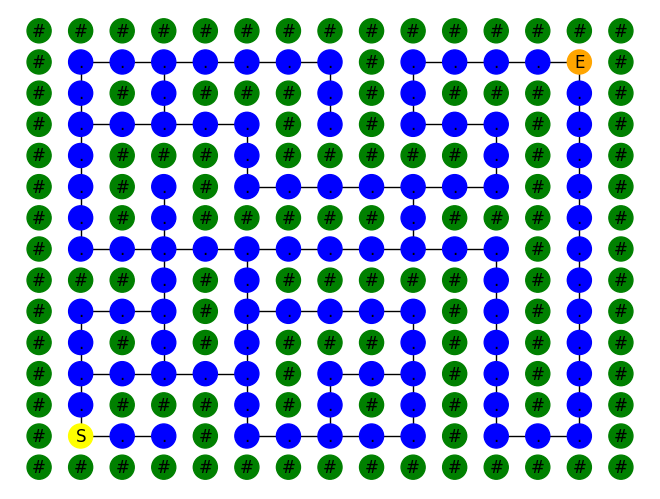

In [267]:
plot_graph(graph)

In [268]:
def path_cost(path):
    last_diff = None
    last_direction = (0 , 1) # Facing east
    score = len(path) - 1
   
    for n1, n2 in itertools.pairwise(path):
        direction = tuple(abs(a - b) for a, b in zip(n1, n2))
        
        if last_direction is None:
            last_direction = direction
        elif last_direction != direction:
            score += 1000
            last_direction = direction
            
    return score
        
def v1(data):
    graph, start, end = parse_data(data)

    paths = {}
    for path in tqdm(nx.simple_paths.all_simple_paths(graph, start, end)):
        score = path_cost(path)
        paths[frozenset(path)] = score
        
        
    path = min(paths, key=paths.get)
    plot_path(graph, path)    
    return paths[path]
        

In [269]:
def v2(data, part="a", debug=True):
    graph, g_shape, start, end = parse_data2(data)
    if part == "a":
        path = nx.shortest_path(graph, start, end, weight="weight")
        score = nx.path_weight(graph, path, weight="weight")
        if debug:
            edges = set(itertools.pairwise(path))
            plot_path2(graph, path, edges, g_shape)   
        return score

    paths = set()
    visited_nodes = set()
    edges = set()
    
    for path in tqdm(nx.all_shortest_paths(graph, start, end, weight="weight")):
        paths.update(path)
        edges.update(itertools.pairwise(path))
        
        for node in path:
            if graph.nodes[node]["value"] != "E":
                node, _ = node
            visited_nodes.add(node)
            
    if debug:
        plot_path2(graph, paths, edges, g_shape)   
        
    return len(visited_nodes)

0it [00:00, ?it/s]

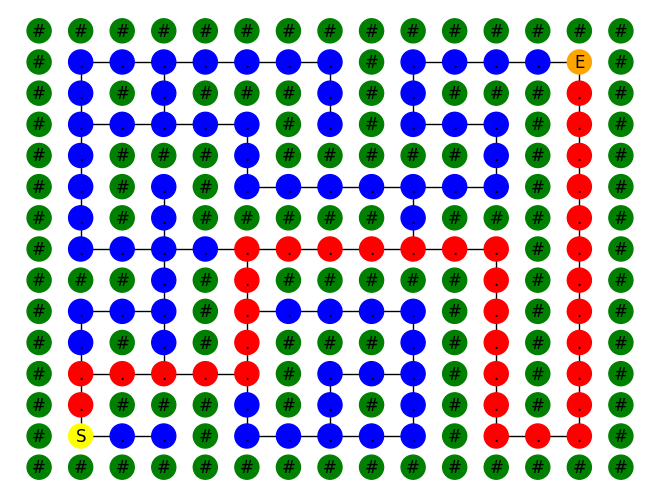

7036

In [270]:
v1(data_test)

0it [00:00, ?it/s]

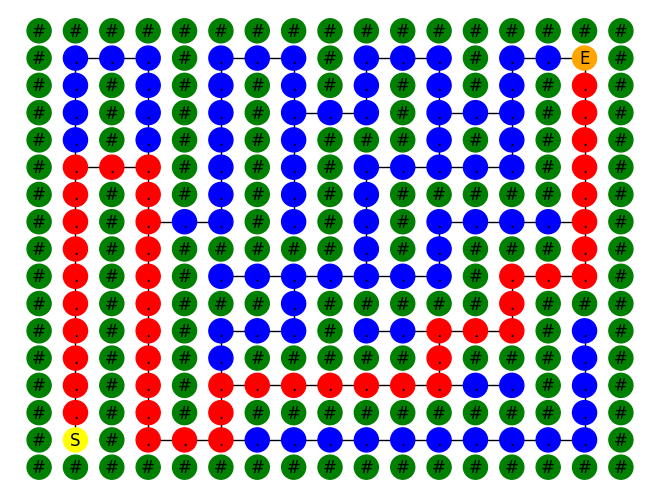

11048

In [271]:
v1(data_test2)

In [272]:
graph, g_shape, start, end = parse_data2(data_test)

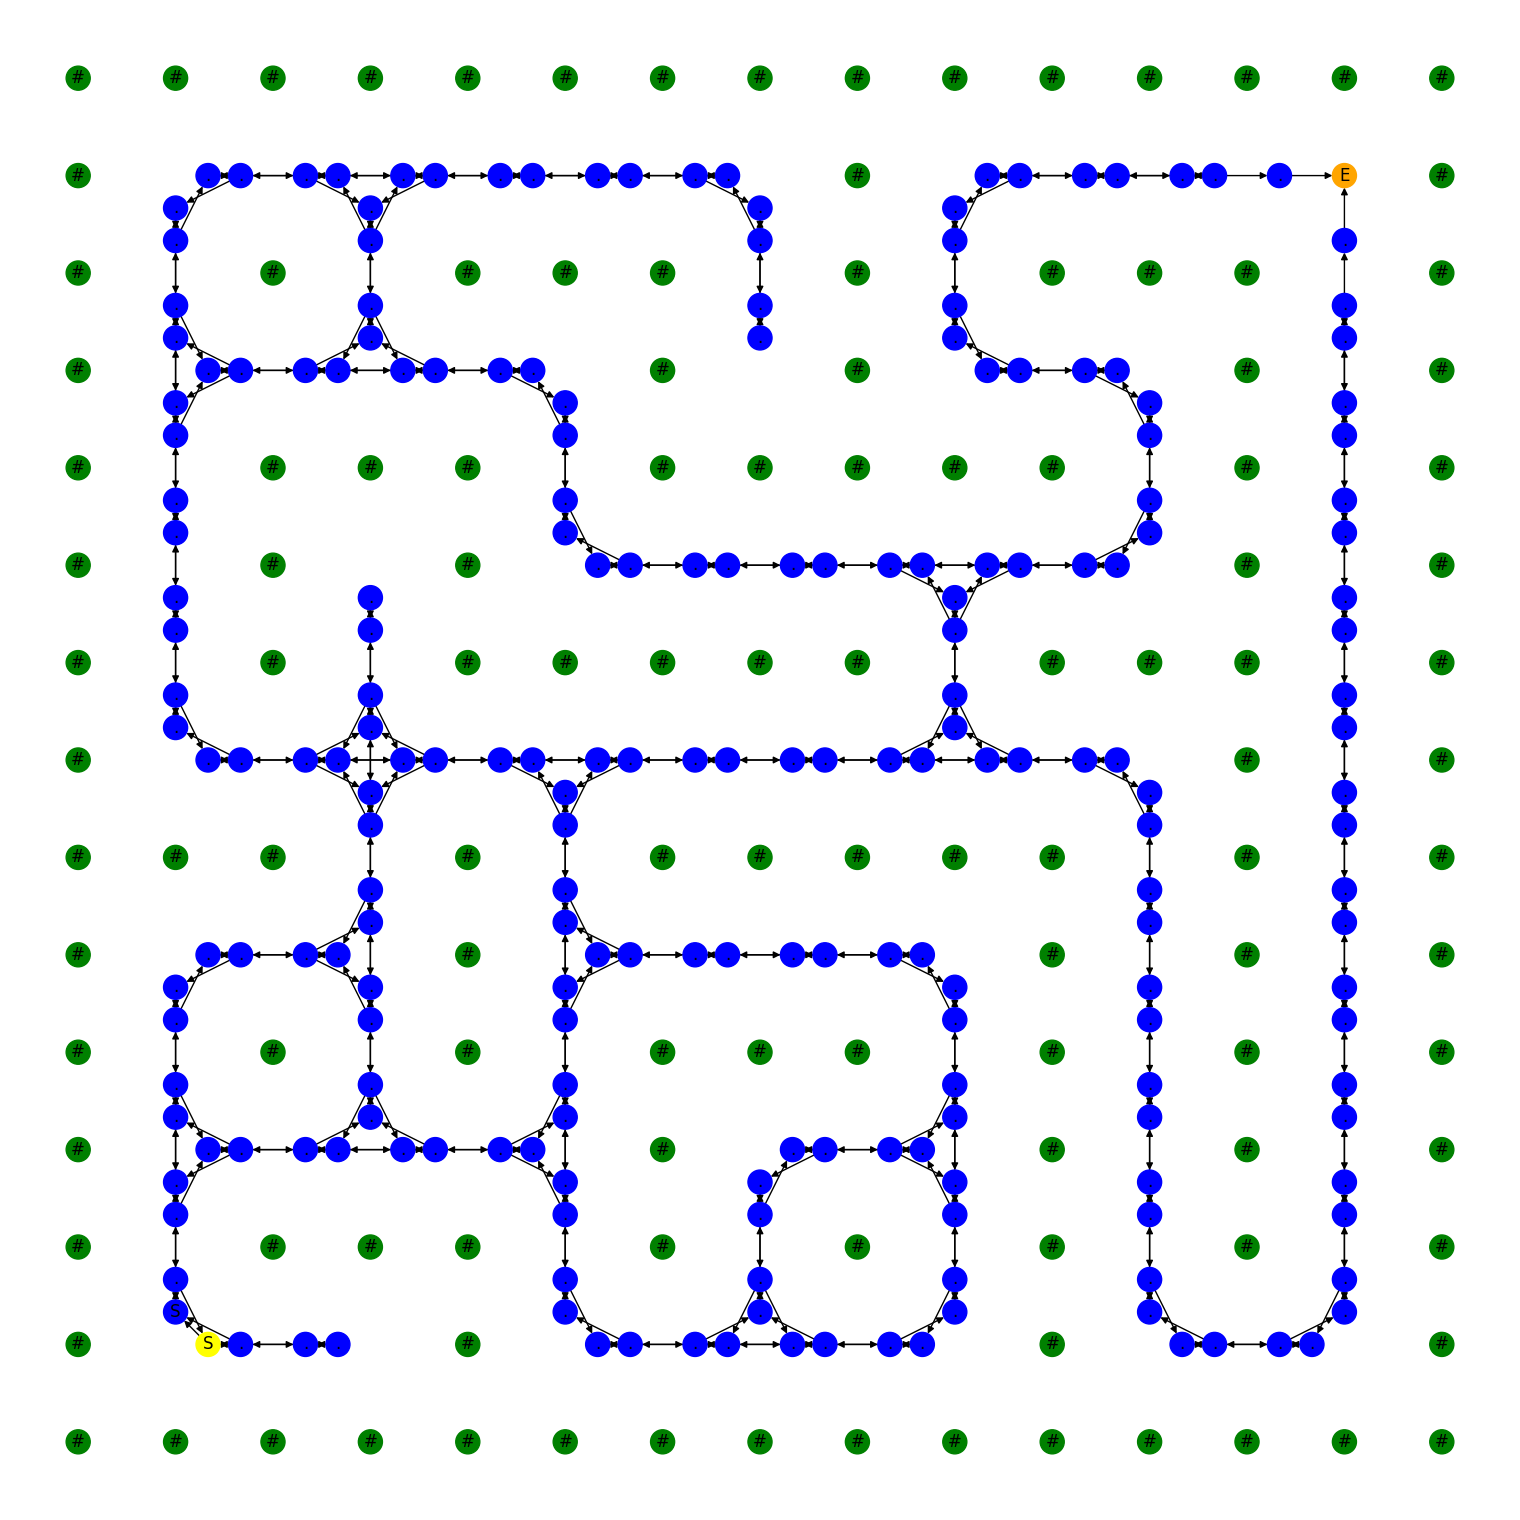

In [273]:
plot_graph2(graph, g_shape)

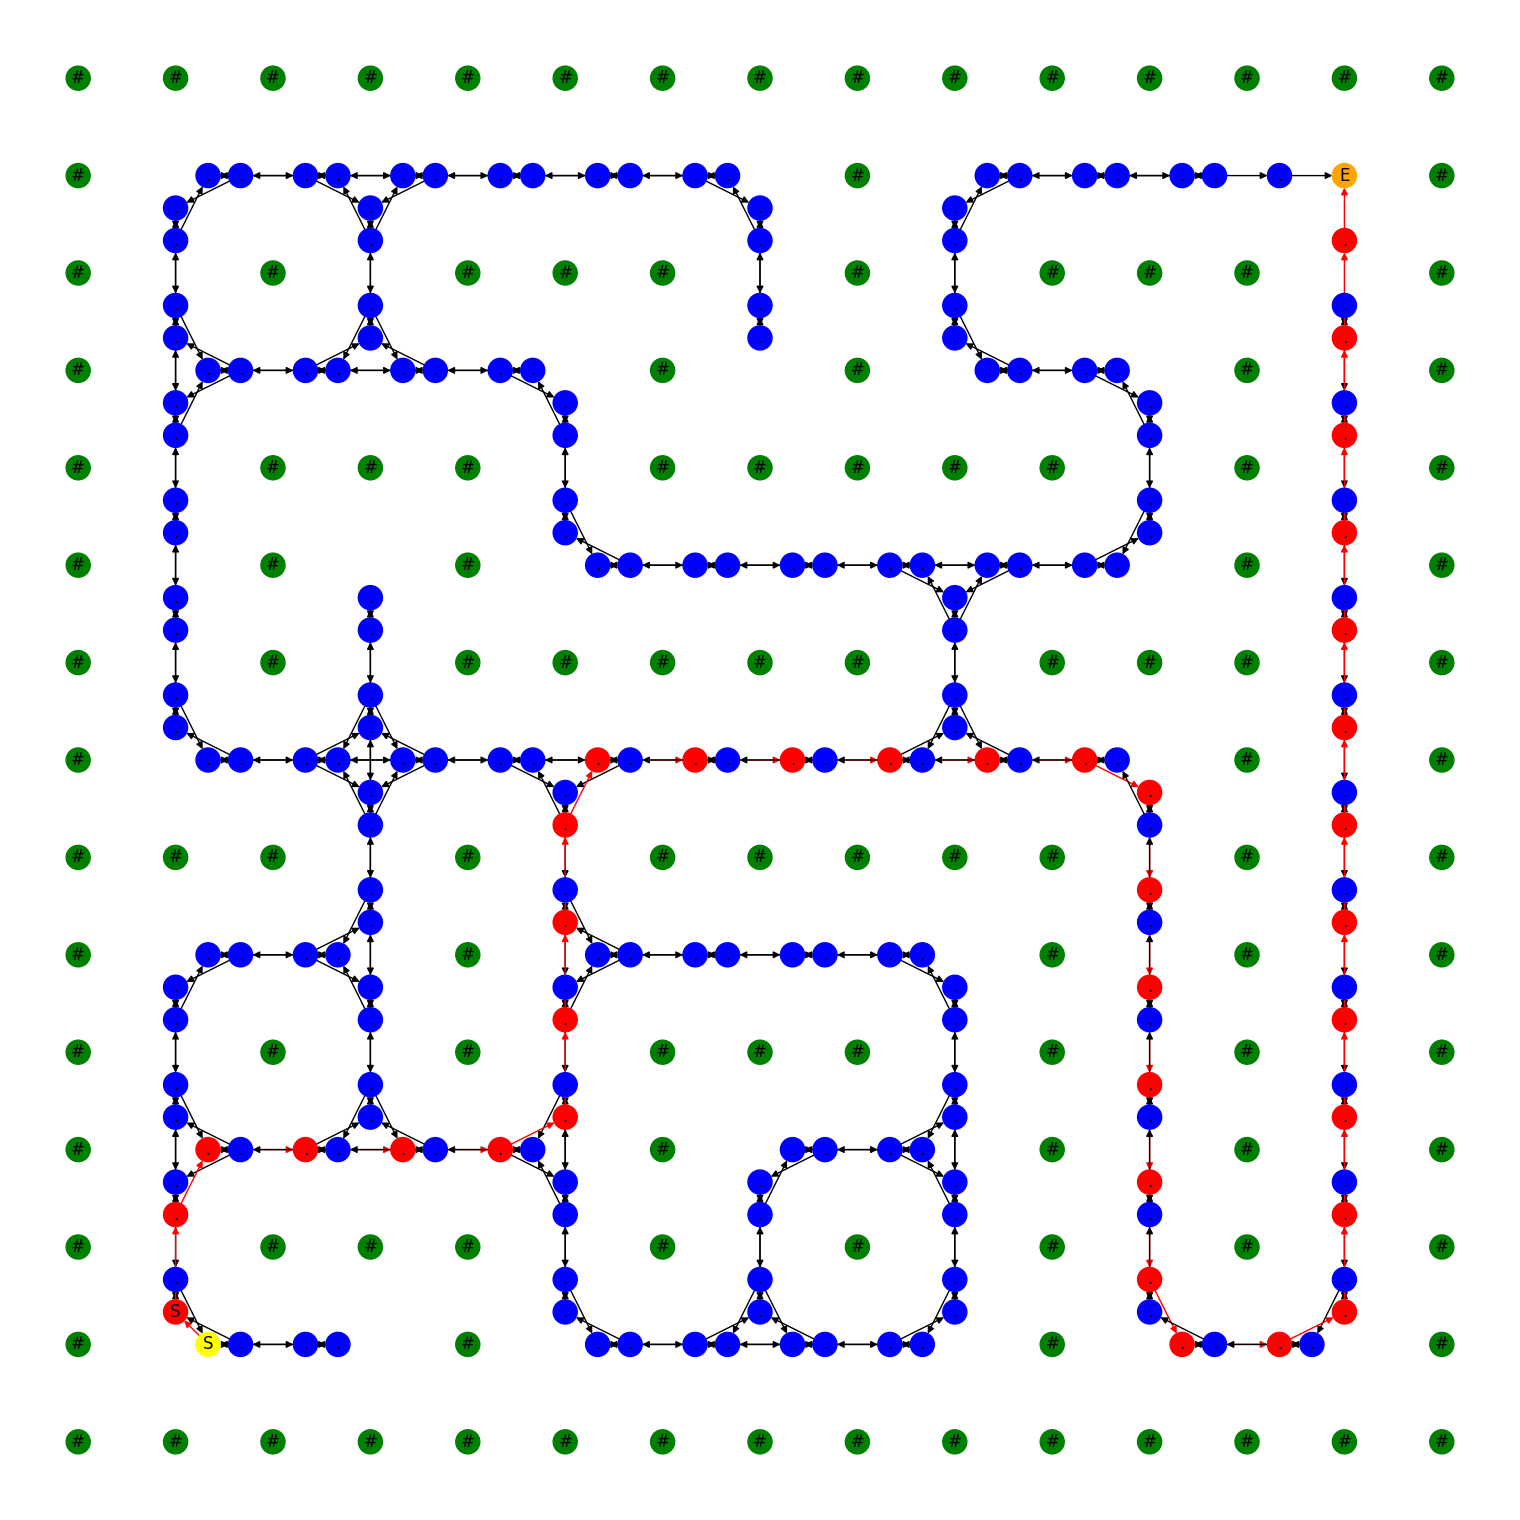

7036

In [274]:
v2(data_test)

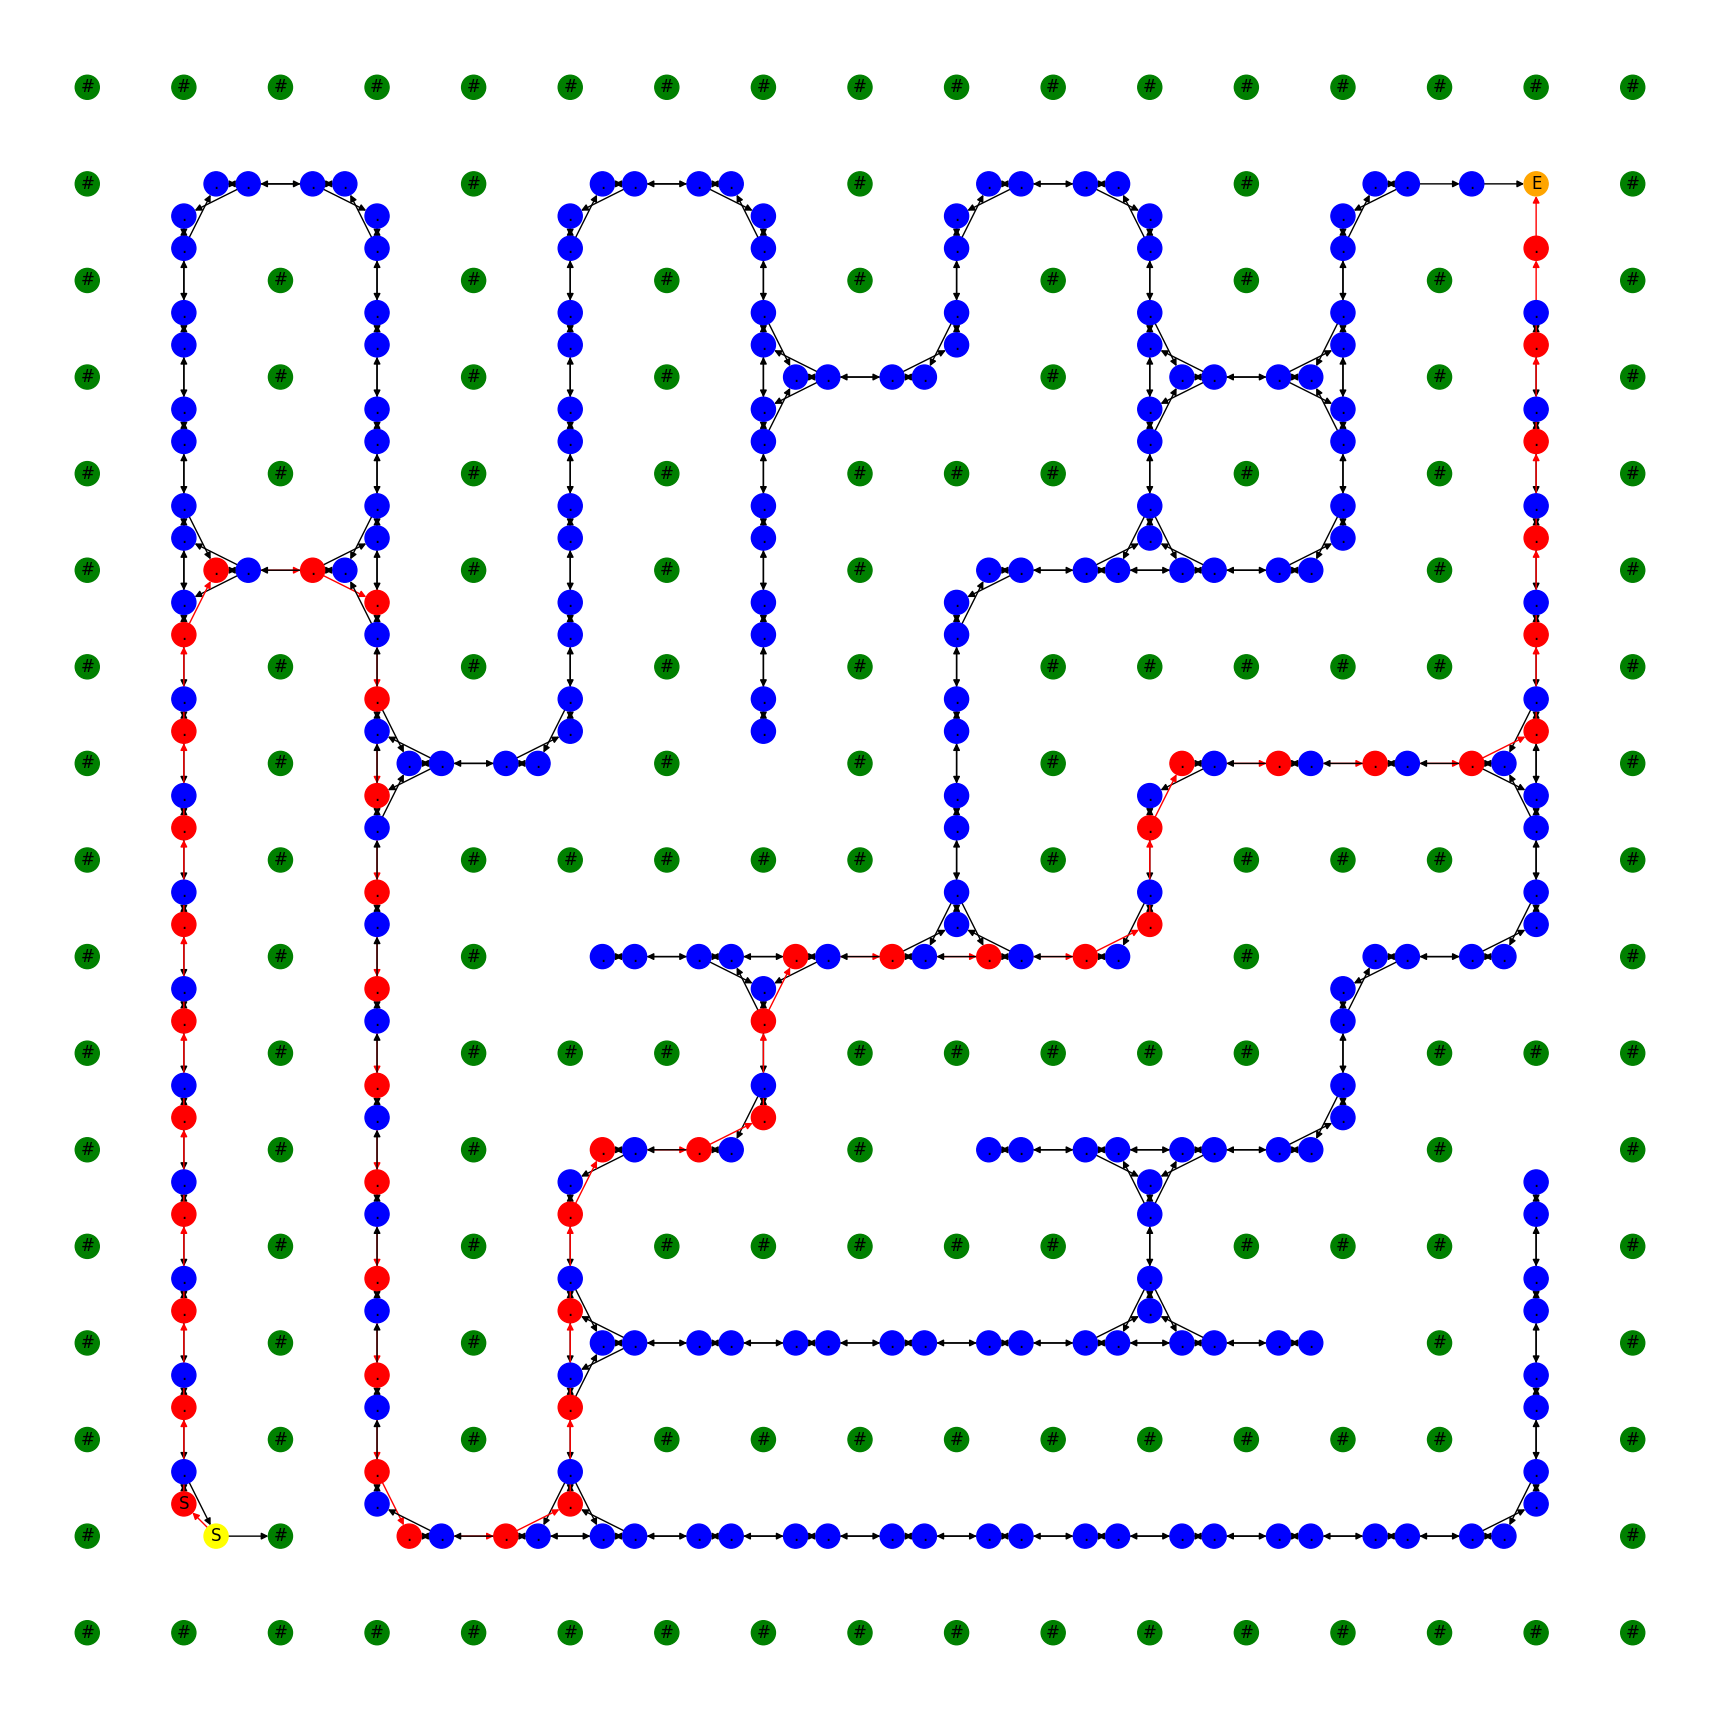

11048

In [277]:
v2(data_test2)

In [278]:
answer_a = v2(puzzle.input_data, debug=False)
answer_a

99448

In [279]:
puzzle.answer_a = answer_a

## Part 2

0it [00:00, ?it/s]

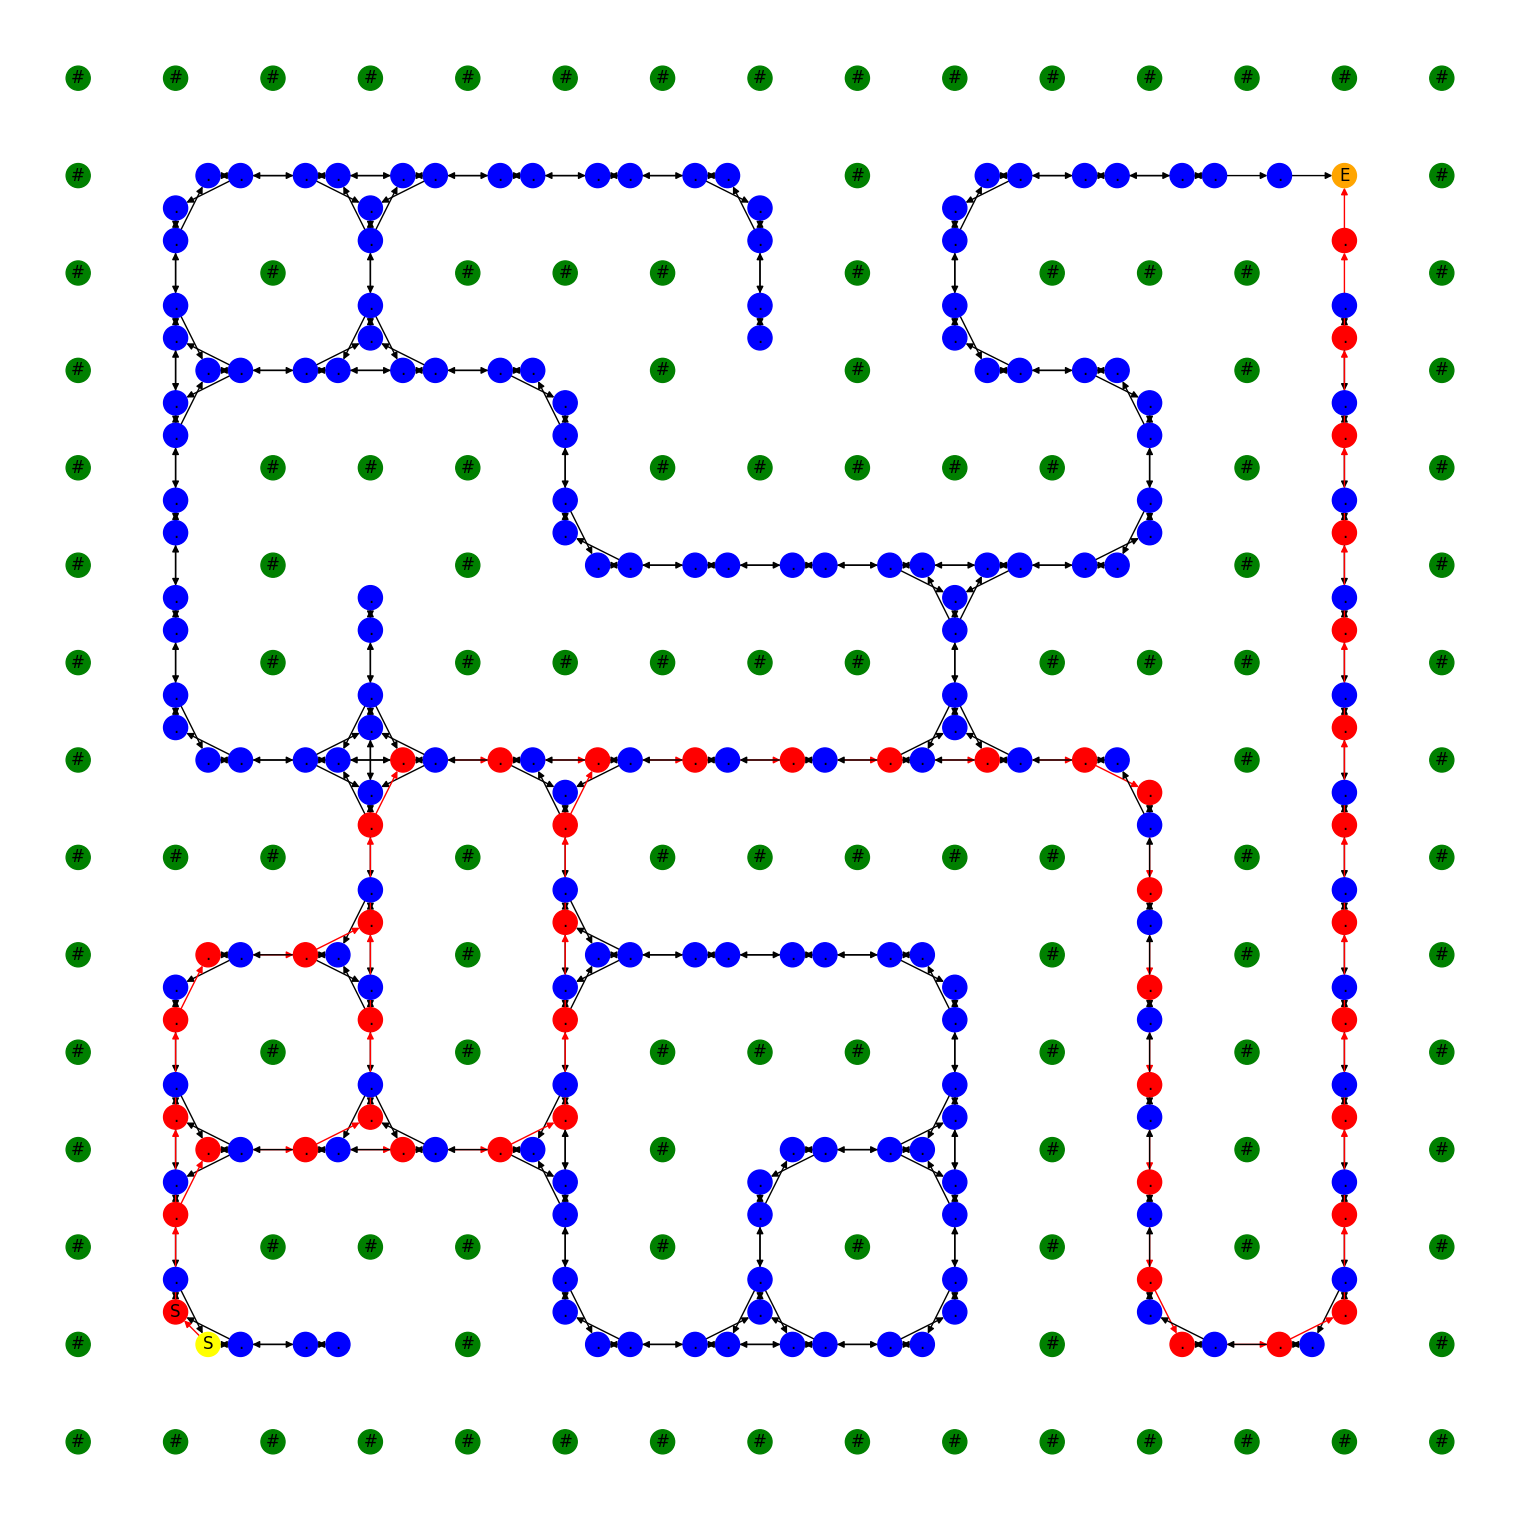

45

In [280]:
v2(data_test, part="b")

0it [00:00, ?it/s]

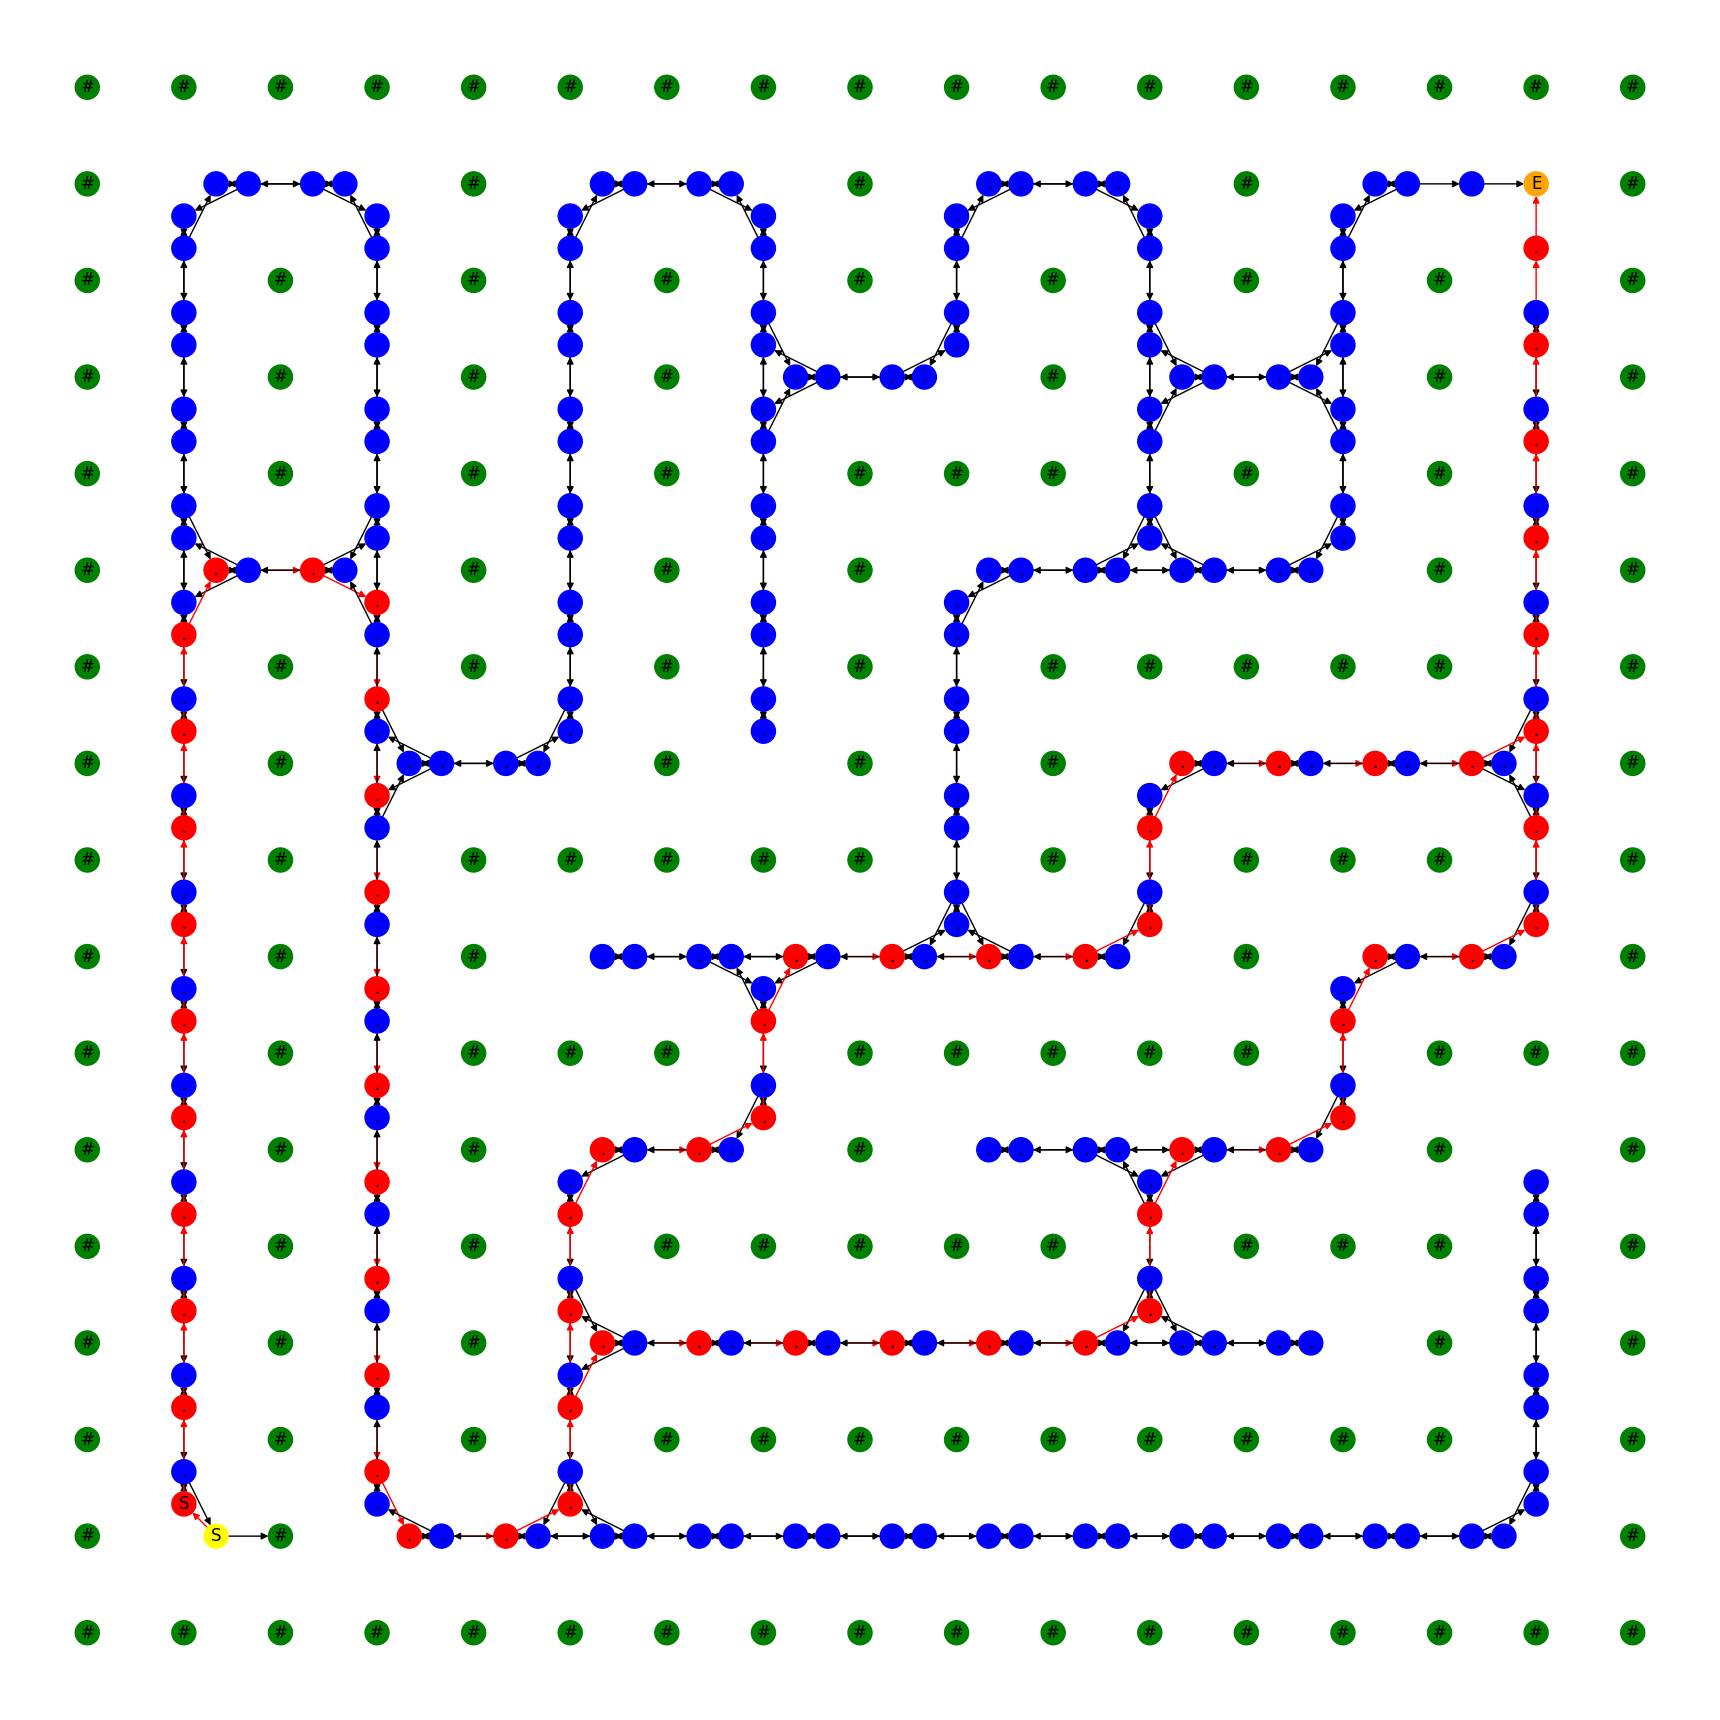

64

In [281]:
v2(data_test2, part="b")

In [282]:
answer_b = v2(puzzle.input_data, part="b", debug=False)
answer_b

0it [00:00, ?it/s]

498

In [283]:
puzzle.answer_b = answer_b

That's the right answer!  You are one gold star closer to finding the Chief Historian.You have completed Day 16! You can [Shareon
  Bluesky
Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


###### Day 16

###### Day 16

In [ ]:
puzzle = Puzzle(2024, 16)

###### Day 16

In [ ]:
puzzle = Puzzle(2024, 16)

###### Day 16

In [ ]:
puzzle = Puzzle(2024, 16)

###### Day 16

In [ ]:
puzzle = Puzzle(2024, 16)

###### Day 16

In [ ]:
puzzle = Puzzle(2024, 16)

###### Day 16

In [ ]:
puzzle = Puzzle(2024, 16)